In [1]:
###b值的时域分布  Mc=1.5
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator 
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 7
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 7
plt.rcParams['ytick.minor.size']  = 4

## stress and disp
shear = sio.loadmat("shear.mat")["shear"][:,0]
disp = sio.loadmat("disp.mat")["disp"][:,0]
times = sio.loadmat("time.mat")["time"][0]
shears = shear[416460-7080:416460+7080]
timess = times[416460-7080:416460+7080]
timess = timess-4164.6

def bvalue(nms, strs):
    strs=strs
    path = os.path.join(strs+"_mag_result.csv")
    data=np.array(pd.read_csv(path, header=None, encoding="utf-8"))  #(3*n)  时间， 震级， dB值
    m_s = np.around(data[1],1)  #震级的数据int(np.ceil(M_sum.shape[0]/400))
    t_s = data[0]

# AE rate
    num=[]
    for i in range(141):
        index = np.where((data[0]>=i)&(data[0]<=i+1))
        num.append(len(index[0]))

##b值
    index=np.where(m_s<1.5)      #震级小于1.5的索引
    index=np.array(index)[0,:]   
    m_sd = np.delete(m_s, index, axis=0)  #删除震级小于1.5的索引
    t_sd = np.delete(t_s, index, axis=0 )  #删除后的时间

    s1=[]
    for j in range(m_sd.shape[0]):
        s1.append((m_sd[j]-np.mean(m_sd))**2)
    std = np.sqrt(np.sum(s1)/(m_sd.shape[0]*(m_sd.shape[0]-1)))


    b=[]
    time=[]
    erro=[]
    nums = []
    ns=nms
    m_s1 = []
    m_s2 = []

    ##另一种
    b1=[]

    for i in range(10000):
        m = m_sd[(0+1*i):(ns+1*(i))]
        t = t_sd[(0+1*i):(ns+1*(i))]
        
        ms=sum(abs(np.diff(m)))/len(m)
        m_s1.append(ms)
        m_ss = sum(m_s1)/len(m_s1)
        m_s2.append(np.median(m_s1))
        
        if t.shape[0] <ns:
            break
        nums.append(t.shape[0])
        time.append(t[-1])
        erro.append((np.log10(np.e)/(np.mean(m)-1.5+0.05))/np.sqrt(m.shape[0]))
        b.append(np.log10(np.e)/(np.mean(m)-1.5+0.05))
        
        bs = np.log10(np.e)/(np.mean(m)-1.5+0.05)
    
        s1=[]
        for j in range(m.shape[0]):
            m_ave = np.mean(m)
            s1.append((m[j]-m_ave)**2)
        std = np.sqrt(np.sum(s1)/(m.shape[0]*(m.shape[0]-1)))
        std_e = 2.30*bs**2*std
        b1.append(std_e)
            
    time=np.nan_to_num(time, nan=0)
    erro=np.nan_to_num(erro, nan=0)
    b=np.nan_to_num(b, nan=0)

    time=np.delete(time, np.where(time==0))
    erro=np.delete(erro, np.where(erro==0))
    b=np.delete(b, np.where(b==0))

    ##主震点
    inx = np.where(data[1]==np.max(data[1]))
    tm = data[0][inx][0]
    eqr= np.max(data[1])
    
    return time, b, b1

one = bvalue(50, "143711")
two = bvalue(100,"143711")
three = bvalue(150, "143711")
four = bvalue(200,"143711")


one1 = bvalue(50, "145417")
two1 = bvalue(100,"145417")
three1 = bvalue(150, "145417")
four1 = bvalue(200,"145417")

one2 = bvalue(50, "143922")
two2 = bvalue(100,"143922")
three2 = bvalue(150, "143922")
four2 = bvalue(200,"143922")

one3 = bvalue(50, "144836")
two3 = bvalue(100,"144836")
three3 = bvalue(150, "144836")
four3 = bvalue(200,"144836")


###绿色箭头 通过以下命令去计算
# t1=four[0]-70.3164
# inx = np.where(t1<0)[0]
# t1=t1[inx]
# b1 = four[1][inx]
# # max = np.max(b1)
# inx1=np.where(b1>1.467)[0]  ###一般1.467 用max 代替
# t1[inx1]

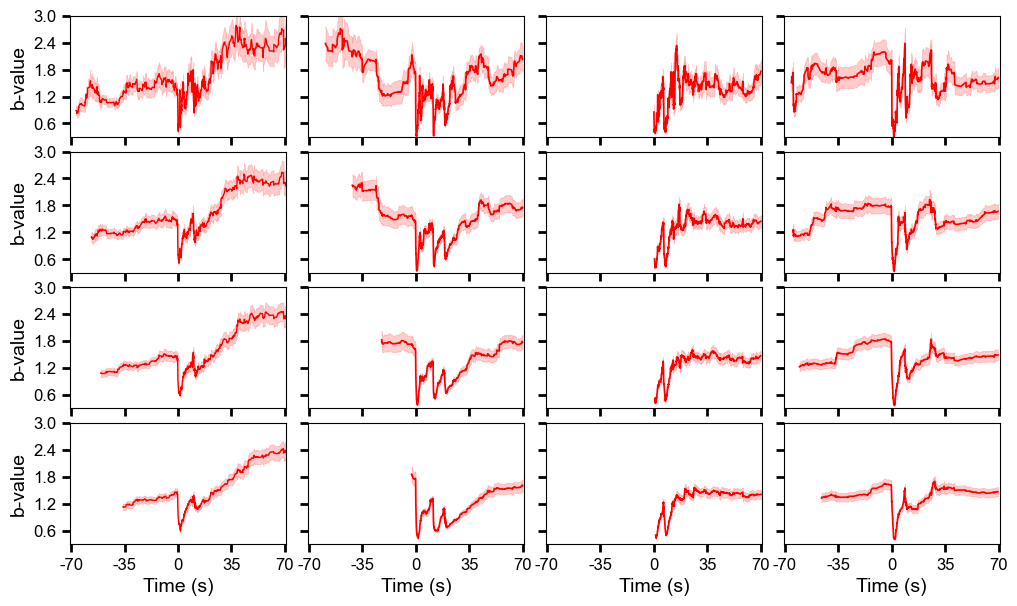

In [54]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 6
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 6
plt.rcParams['ytick.minor.size']  = 4
fig, ((ax1,ax5,ax9, ax13), (ax2, ax6, ax10, ax14), (ax3,ax7,ax11,ax15), (ax4, ax8,ax12, ax16)) = plt.subplots(4,4,figsize=(12.0,7.0),facecolor='w', gridspec_kw={'height_ratios':[1,1,1,1],'hspace':0.12, 'wspace':0.1},dpi=100)

ax1.plot(one[0]-70.3164, one[1], c="r", ls="-", lw=1.0)
ax1.fill_between(one[0]-70.3164, one[1] - one[2], one[1] + one[2], color='r', linewidth=0.5, alpha=0.2)
ax1.set_ylim([0.3, 3.0])
ax1.set_xlim([-70.8, 70.8])
ax1.set_ylabel('b-value', fontsize=14)
y_major_locator=MultipleLocator(0.6)
ax1.yaxis.set_major_locator(y_major_locator)
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax1.xaxis.set_ticklabels([])

ax2.plot(two[0]-70.3164, two[1], c="r", ls="-", lw=1.0)
ax2.fill_between(two[0]-70.3164, two[1] - two[2], two[1] + two[2], color='r', linewidth=0.5, alpha=0.2)
ax2.set_ylim([0.3, 3.0])
ax2.set_xlim([-70.8, 70.8])
ax2.set_ylabel('b-value', fontsize=14)
y_major_locator=MultipleLocator(0.6)
ax2.yaxis.set_major_locator(y_major_locator)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax2.xaxis.set_ticklabels([])
# ax2.yaxis.set_ticklabels([])

ax3.plot(three[0]-70.3164, three[1], c="r", ls="-", lw=1.0)
ax3.fill_between(three[0]-70.3164, three[1] - three[2], three[1] + three[2], color='r', linewidth=0.5, alpha=0.2)
ax3.set_ylim([0.3, 3.0])
ax3.set_xlim([-70.8, 70.8])
ax3.set_xlabel('Time (s)', fontsize=14)
ax3.set_ylabel('b-value', fontsize=14)
y_major_locator=MultipleLocator(0.6)
ax3.yaxis.set_major_locator(y_major_locator)
ax3.tick_params(axis='both', labelsize=12)
ax3.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax3.xaxis.set_ticklabels([])

ax4.plot(four[0]-70.3164, four[1], c="r", ls="-", lw=1.0)
ax4.fill_between(four[0]-70.3164, four[1] - four[2], four[1] + four[2], color='r',linewidth=0.5, alpha=0.2)
ax4.set_ylim([0.3, 3.0])
ax4.set_xlim([-70.8, 70.8])
ax4.set_xlabel('Time (s)', fontsize=14)
ax4.set_ylabel('b-value', fontsize=14)
y_major_locator=MultipleLocator(0.6)
ax4.yaxis.set_major_locator(y_major_locator)
ax4.tick_params(axis='both', labelsize=12)
ax4.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])


ax5.plot(one2[0]-70.6398, one2[1], c="r", ls="-", lw=1.2)
ax5.fill_between(one2[0]-70.6398, one2[1] - one2[2], one2[1] + one2[2], color='r',linewidth=0.5, alpha=0.2)
ax5.set_ylim([0.3, 3.0])
ax5.set_xlim([-70.8, 70.8])
# ax5.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax5.yaxis.set_major_locator(y_major_locator)
ax5.tick_params(axis='both', labelsize=12)
ax5.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])

ax6.plot(two2[0]-70.6398, two2[1], c="r", ls="-", lw=1.2)
ax6.fill_between(two2[0]-70.6398, two2[1] - two2[2], two2[1] + two2[2], color="r",linewidth=0.5, alpha=0.2)
ax6.set_ylim([0.3, 3.0])
ax6.set_xlim([-70.8, 70.8])
y_major_locator=MultipleLocator(0.6)
ax6.yaxis.set_major_locator(y_major_locator)
ax6.tick_params(axis='both', labelsize=12)
ax6.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])

ax7.plot(three2[0]-70.6398, three2[1], c="r", ls="-", lw=1.2)
ax7.fill_between(three2[0]-70.6398, three2[1] - three2[2], three2[1] + three2[2], color='r',linewidth=0.5, alpha=0.2)
ax7.set_ylim([0.3, 3.0])
ax7.set_xlim([-70.8, 70.8])
# ax7.set_xlabel('Time (s)', fontsize=15)
# ax7.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax7.yaxis.set_major_locator(y_major_locator)
ax7.tick_params(axis='both', labelsize=12)
ax7.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax7.xaxis.set_ticklabels([])
ax7.yaxis.set_ticklabels([])

ax8.plot(four2[0]-70.6398, four2[1], c="r", ls="-", lw=1.2)
ax8.fill_between(four2[0]-70.6398, four2[1] - four2[2], four2[1] + four2[2], color='r',linewidth=0.5, alpha=0.2)
ax8.set_ylim([0.3, 3.0])
ax8.set_xlim([-70.8, 70.8])
ax8.set_xlabel('Time (s)', fontsize=14)
y_major_locator=MultipleLocator(0.6)
ax8.yaxis.set_major_locator(y_major_locator)
ax8.tick_params(axis='both', labelsize=12)
ax8.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax8.yaxis.set_ticklabels([])


ax9.plot(one3[0]-70.7883, one3[1], c="r", ls="-", lw=1.2)
ax9.fill_between(one3[0]-70.7883, one3[1] - one3[2], one3[1] + one3[2], color='r',linewidth=0.5, alpha=0.2)
ax9.set_ylim([0.3, 3.0])
ax9.set_xlim([-70.8, 70.8])
# ax9.set_xlabel('Time (s)', fontsize=11)
y_major_locator=MultipleLocator(0.6)
ax9.yaxis.set_major_locator(y_major_locator)
# ax9.tick_params(axis='both', labelsize=9)
ax9.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_ticklabels([])

ax10.plot(two3[0]-70.7883, two3[1], c="r", ls="-", lw=1.2)
ax10.fill_between(two3[0]-70.7883, two3[1] - two3[2], two3[1] + two3[2], color='r', linewidth=0.5,alpha=0.2)
ax10.set_ylim([0.3, 3.0])
ax10.set_xlim([-70.8, 70.8])
y_major_locator=MultipleLocator(0.6)
ax10.yaxis.set_major_locator(y_major_locator)
# ax10.tick_params(axis='both', labelsize=9)
ax10.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_ticklabels([])

ax11.plot(three3[0]-71, three3[1], c="r", ls="-", lw=1.2)
ax11.fill_between(three3[0]-71, three3[1] - three3[2], three3[1] + three3[2], color='r',linewidth=0.5, alpha=0.2)
ax11.set_ylim([0.3, 3.0])
ax11.set_xlim([-70.8, 70.8])
# ax7.set_xlabel('Time (s)', fontsize=15)
# ax7.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax11.yaxis.set_major_locator(y_major_locator)
# ax11.tick_params(axis='both', labelsize=9)
ax11.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax11.xaxis.set_ticklabels([])
ax11.yaxis.set_ticklabels([])

ax12.plot(four3[0]-70.7883, four3[1], c="r", ls="-", lw=1.2)
ax12.fill_between(four3[0]-70.7883, four3[1] - four3[2], four3[1] + four3[2], color='r',linewidth=0.5, alpha=0.2)
ax12.set_ylim([0.3, 3.0])
ax12.set_xlim([-70.8, 70.8])
ax12.set_xlabel('Time (s)', fontsize=14)
# ax7.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax12.yaxis.set_major_locator(y_major_locator)
ax12.tick_params(axis='both', labelsize=12)
ax12.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_ticklabels([])

ax13.plot(one1[0]-70.7883, one1[1], c="r", ls="-", lw=1.2)
ax13.fill_between(one1[0]-70.7883, one1[1] - one1[2], one1[1] + one1[2], color='r',linewidth=0.5, alpha=0.2)
ax13.set_ylim([0.3, 3.0])
ax13.set_xlim([-70.8, 70.8])
# ax9.set_xlabel('Time (s)', fontsize=11)
y_major_locator=MultipleLocator(0.6)
ax13.yaxis.set_major_locator(y_major_locator)
# ax13.tick_params(axis='both', labelsize=12)
ax13.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax13.xaxis.set_ticklabels([])
ax13.yaxis.set_ticklabels([])


ax14.plot(two1[0]-71, two1[1], c="r", ls="-", lw=1.2)
ax14.fill_between(two1[0]-71, two1[1] - two1[2], two1[1] + two1[2], color='r',linewidth=0.5, alpha=0.2)
ax14.set_ylim([0.3, 3.0])
ax14.set_xlim([-70.8, 70.8])
y_major_locator=MultipleLocator(0.6)
ax14.yaxis.set_major_locator(y_major_locator)
# ax14.tick_params(axis='both', labelsize=9)
ax14.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax14.xaxis.set_ticklabels([])
ax14.yaxis.set_ticklabels([])

ax15.plot(three1[0]-71, three1[1], c="r", ls="-", lw=1.2)
ax15.fill_between(three1[0]-71, three1[1] - three1[2], three1[1] + three1[2], color='r', linewidth=0.5, alpha=0.2)
ax15.set_ylim([0.3, 3.0])
ax15.set_xlim([-70.8, 70.8])
# ax7.set_xlabel('Time (s)', fontsize=15)
# ax7.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax15.yaxis.set_major_locator(y_major_locator)
# ax15.tick_params(axis='both', labelsize=9)
ax15.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
ax15.xaxis.set_ticklabels([])
ax15.yaxis.set_ticklabels([])

ax16.plot(four1[0]-71, four1[1], c="r", ls="-", lw=1.2)
ax16.fill_between(four1[0]-71, four1[1] - four1[2], four1[1] + four1[2], color='r',linewidth=0.5, alpha=0.2)
ax16.set_ylim([0.3, 3.0])
ax16.set_xlim([-70.8, 70.8])
ax16.set_xlabel('Time (s)', fontsize=14)
# ax7.set_ylabel('b-value', fontsize=15)
y_major_locator=MultipleLocator(0.6)
ax16.yaxis.set_major_locator(y_major_locator)
ax16.tick_params(axis='both', labelsize=12)
ax16.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# ax12.xaxis.set_ticklabels([])
ax16.yaxis.set_ticklabels([])

plt.savefig("E1_E4_N.png", dpi=800,  bbox_inches="tight")